In [1]:

# Setup notebook
from pathlib import Path
from learntools.time_series.style import *  # plot style settings

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
grace_dir = Path('../input/grace-simulated-accelerometer-data')

In [3]:
df_A = pd.read_csv(grace_dir/'ACC1B_2005-05-02_A_MDC-02.asc',header=None, sep=' ', skiprows=23)
df_B = pd.read_csv(grace_dir/'ACC1B_2005-05-02_B_MDC-02.asc',header=None, sep=' ', skiprows=23)

In [4]:
df_B.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,168264000,B,-5.646727e-07,0.000008,-8.601977e-07,6.994885e-08,5.632299e-09,2.823088e-08,3.918335e-11,1.052714e-09,3.988111e-11,0
1,168264005,B,-5.646549e-07,0.000008,-8.602315e-07,1.154125e-07,8.717490e-09,-3.230312e-08,3.918335e-11,1.052714e-09,3.988111e-11,0
2,168264010,B,-5.646940e-07,0.000008,-8.602842e-07,5.439301e-08,9.099131e-09,-1.780208e-08,3.918335e-11,1.052714e-09,3.988111e-11,0
3,168264015,B,-5.646751e-07,0.000008,-8.602696e-07,-1.580365e-07,1.069097e-08,1.659535e-08,3.918335e-11,1.052714e-09,3.988111e-11,0
4,168264020,B,-5.646651e-07,0.000008,-8.602738e-07,-4.511358e-08,-5.024903e-10,1.291743e-08,3.918335e-11,1.052714e-09,3.988111e-11,0


In [5]:
y_x = df_B.loc[:, 2]

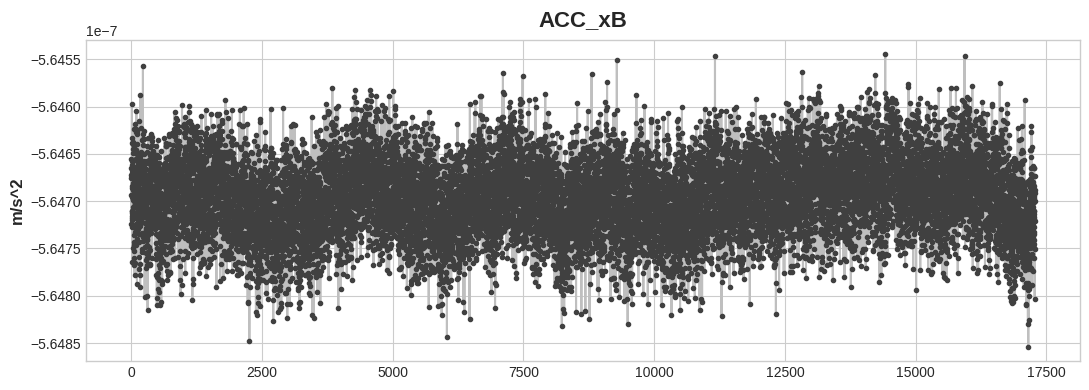

In [6]:
ax = y_x.plot(**plot_params)
ax.set(title="ACC_xB", ylabel="m/s^2");

# Determine trend with a moving average plot

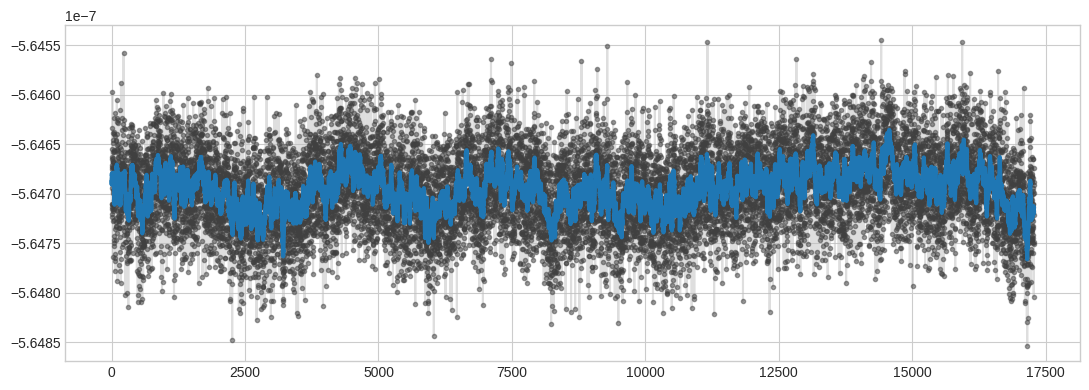

In [7]:
trend = y_x.rolling(
    window=20,       # 365-day window
    center=True,      # puts the average at the center of the window
    min_periods=10,  # choose about half the window size
).mean()              # compute the mean (could also do median, std, min, max, ...)

# Make a plot
ax = y_x.plot(**plot_params, alpha=0.5)
ax = trend.plot(ax=ax, linewidth=3)


# Create a Trend Feature

In [8]:
from statsmodels.tsa.deterministic import DeterministicProcess

# Instantiate `DeterministicProcess` with arguments
# appropriate for a cubic trend model
dp = DeterministicProcess(
    index=y_x.index,  # dates from the training data
    constant=True,       # dummy feature for the bias (y_intercept)
    order=3,             # the time dummy (trend)
    drop=True,           # drop terms if necessary to avoid collinearity
)

In [9]:
one_day_steps=24*3600/5

In [10]:
# Create the feature set for the dates given in y.index
X = dp.in_sample()

# Create features for a 90-day forecast.
X_fore =  dp.out_of_sample(steps=one_day_steps/5)

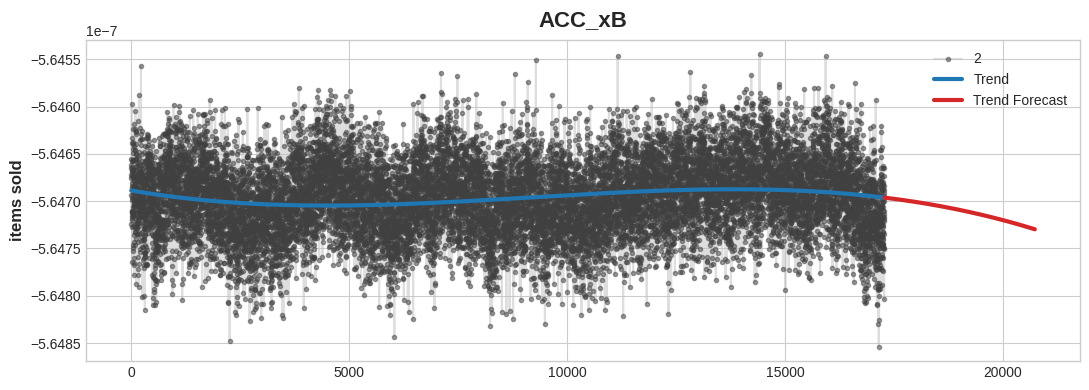

In [11]:
model = LinearRegression()
model.fit(X, y_x)

y_pred = pd.Series(model.predict(X), index=X.index)
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)

ax = y_x.plot(**plot_params, alpha=0.5, title="ACC_xB", ylabel="items sold")
ax = y_pred.plot(ax=ax, linewidth=3, label="Trend", color='C0')
ax = y_fore.plot(ax=ax, linewidth=3, label="Trend Forecast", color='C3')
ax.legend();